# DBNets Tutorial: application to an actual observation
In this jupyter notebook the tool is applied to MWC480 (data from the ALMA archive)

1. Install DBNets with

`pip install DBNets`

2. Import the DBNets library and initialize the ensemble

In [1]:
from DBNets import DBNets
dbnets = DBNets.DBNets()

2024-07-22 16:30:47.606484: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-22 16:30:47.797707: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-07-22 16:30:47.799511: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-22 16:30:48.659844: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Initializing DBNets


Loading the CNN ensemble: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 50/50 [00:29<00:00,  1.70it/s]


3. Collect the data needed on the protoplanetary disc under exam
    - fits file with the continuum observation in ALMA band 6 or 7
    - centre of the disc in pixel coordinates
    - inclination
    - position angle
    - planet position (as an angle or as distance + physical separation)

![definition of inclination and position angle](inclandpa.png)

In [2]:
file_name = 'mwc480.fits'
centre = (1024, 1026)
inclination = 36
pa = 58
distance = 161
rp = 73

4. use DBNets.preproc module to open and preprocess the fits file. This function opens the fits file, rescales and deprojects the disc to make the observation geometrically homogeneous with the synthetic observations used to train the ensemble. The following picture shows the data before and after.

![preprocessing](preprocess.png)

In [3]:
from DBNets import preproc as pp
deproj_image = pp.deproject_image(file_name, distance, inclination, pa, centre, rp)

/home/aleruzza/.local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


this is the image obtained

(-0.5, 127.5, 127.5, -0.5)

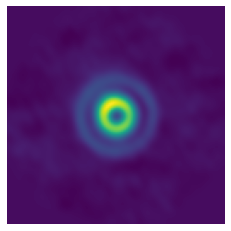

In [4]:
import matplotlib.pyplot as plt
plt.imshow(deproj_image)
plt.axis('off')

5. use the method measure of the DBNets object

In [5]:
presult = dbnets.measure(deproj_image)

the method `measure` returns a probablity density function for $\log M_p$

Text(0.5, 0, '$M_p/M_\\star / M_J/M_\\odot$ ')

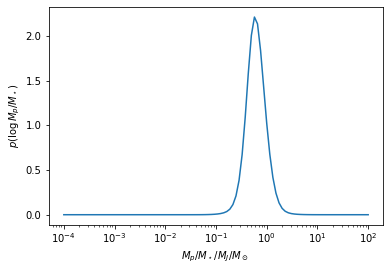

In [6]:
import numpy as np
x = np.linspace(-4,2,100)
plt.plot(10**x, presult.pdf(x))
plt.xscale('log')
plt.ylabel('$p(\log M_p/M_\\star)$')
plt.xlabel('$M_p/M_\\star / M_J/M_\\odot$ ')

it is possible to use `summary_measure()` on the object returned by `measure()` to obtain the median, 16$^\text{th}$ and 84$^\text{th}$ percentiles. The result is directly as a planetary mass (not logged). It is however possible to obtain the $\log M_p$ instead using the argument `return_log=True`.

In [7]:
presult.summary_measure()

(0.6067305537403009, 0.4024597252339088, 0.938908572488493)

Thus the final measure for the planet allegedly embedded in this disc gap is

$$
   \frac{M_p}{M_\star}  = 0.61^{+0.32}_{-0.21} \frac{M_J}{M_\odot}
$$

To check if the result is reliable according to the threshold discussed in Ruzza et al. (2023) check the attribute `reliable`

In [8]:
presult.reliable

True